# TP noté -- Statistical models for decision making - partie 2

Cet devoir noté est composé de deux exercices. Il sera idéalement réalisé en binome et éventuellement seul. Les réponses seront données dans un notebook qui indiquera clairement les **noms et prénoms des élèves** l'ayant realisé.


# DURON FÉLIX


# KARCH TOM

## Exercice 1

Nous souhaitons évaluer si un nouveau produit a un effet significatif sur le rendement de moteurs. Pour y répondre, ce rendement (*Efficiency*) a été mesuré sur deux types de moteurs (*Brand_1* et *Brand_2*) et en testant différents niveaux de concentration (*Concentration*) du produit. Les observations sont dans le fichier *E2_Efficiency_Obs.csv*. Plus spécifiquement, nous nous demandons :
- Le produit semble-t-il avoir un effet ?
- Cet effet est-il différent en fonction de la marque du moteur ?
- Cet effet dépend-il de la concentration du produit ?

### Question 1.1 

Ouvrez et observez les données. A leur vue, quelle vous semble être la réponse aux trois questions posées plus haut ?

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


dataframe=pandas.read_csv("./E1_Efficiency_Obs.csv",sep=',')
dataframe.columns

Index(['Brand', 'Concentration', 'Efficiency'], dtype='object')

In [2]:
df_brand1 = dataframe[dataframe['Brand'] == 'Brand_1']
df_brand2 = dataframe[dataframe['Brand'] == 'Brand_2']

df_brand1_sorted = df_brand1.sort_values(by='Concentration')
df_brand2_sorted = df_brand2.sort_values(by='Concentration')

print(df_brand1_sorted.head())
print(df_brand1_sorted.tail())

print(df_brand2_sorted.head())
print(df_brand2_sorted.tail())


      Brand  Concentration  Efficiency
24  Brand_1        0.40264      1.0992
49  Brand_1        0.55028      1.4775
12  Brand_1        0.62834      1.7433
17  Brand_1        0.74378      1.6128
42  Brand_1        0.85331      1.4626
      Brand  Concentration  Efficiency
45  Brand_1         8.5522      5.2985
3   Brand_1         8.5625      5.2151
14  Brand_1         8.8878      5.8720
4   Brand_1         9.8002      5.4256
30  Brand_1         9.8588      5.9266
      Brand  Concentration  Efficiency
65  Brand_2        0.80066      3.5650
53  Brand_2        1.20860      2.1778
56  Brand_2        1.21000      2.5651
52  Brand_2        1.65270      3.7323
55  Brand_2        1.85310      3.2946
      Brand  Concentration  Efficiency
54  Brand_2         7.1062      4.4613
50  Brand_2         9.1547      5.2929
58  Brand_2         9.2460      5.3648
59  Brand_2         9.3187      5.5513
69  Brand_2         9.9749      6.7319


-Q1
Le produit semble avoir un effet car l'efficacité est supérieur à 1 a chaque fois et monte dans des niveaux comme 5 ou 6.

-Q2
L'effet est le même pour les deux moteurs, le produit permet d'augmenter l'efficacité.

-Q3
Plus la concentrtaion augmente plus l'efficacité augmente.

### Question 1.2 

Afin de répondre aux questions, deux hypothèses sont formulées :
- Pour chaque marque de moteur, la relation entre la concentration et le rendement est supposée linéaire.
- La distribution du bruit des observations est supposé suivre une loi Normale centrée.

Quelle démarche de modélisation statistique allez-vous utiliser pour répondre aux trois questions posées en introduction ? Une fois la démarche bien expliquée, testez la sur les données observées afin de conclure sur l'efficacité du produit.



Vu que la relation entre la concentration et le rendement est supposée linéaire et que l'erreur suit uen loi normal N(0,1), on peut modéliser notre régression linéaire à l'aide de LinearRegression().

Pour voir une difference entre les deux moteurs on entraine deux regressions linéaires, une pour chaque marque.

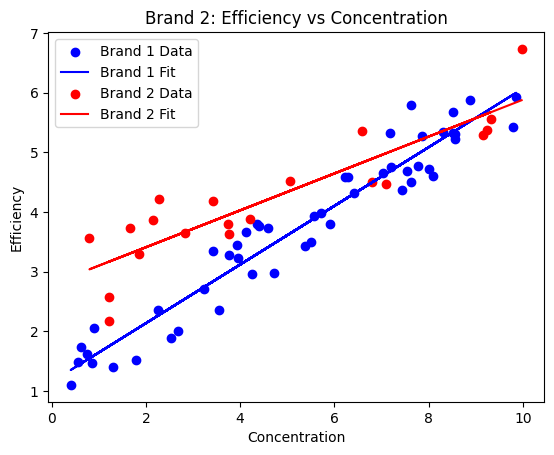

Le MSE pour Brand 1: 0.12887409752130752
 Le MSE pour Brand 2: 0.2216057613258669


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



lr_brand1 = LinearRegression()
lr_brand1.fit(df_brand1[['Concentration']], df_brand1['Efficiency'])
efficiency_pred_b1 = lr_brand1.predict(df_brand1[['Concentration']])

a_b1 = lr_brand1.coef_[0]
b_b1 = lr_brand1.intercept_

plt.scatter(df_brand1[['Concentration']], df_brand1['Efficiency'], color='blue', label='Brand 1 Data')
plt.plot(
    df_brand1['Concentration'],
    efficiency_pred_b1,
    color='blue', label='Brand 1 Fit'
)
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()
plt.title('Brand 1: Efficiency vs Concentration')
# plt.show()


lr_brand2 = LinearRegression()
lr_brand2.fit(df_brand2[['Concentration']], df_brand2['Efficiency'])
efficiency_pred_b2 = lr_brand2.predict(df_brand2[['Concentration']])

plt.scatter(df_brand2[['Concentration']], df_brand2['Efficiency'], color='red', label='Brand 2 Data')
plt.plot(
    df_brand2['Concentration'],
    efficiency_pred_b2,
    color='red', label='Brand 2 Fit'
)
plt.xlabel('Concentration')
plt.ylabel('Efficiency')
plt.legend()
plt.title('Brand 2: Efficiency vs Concentration')
plt.show()


mse_brand1 = mean_squared_error(df_brand1[['Efficiency']], efficiency_pred_b1)
mse_brand2 = mean_squared_error(df_brand2[['Efficiency']], efficiency_pred_b2)

print(f"Le MSE pour Brand 1: {mse_brand1}\n Le MSE pour Brand 2: {mse_brand2}")





On remarque plusieurs choses:
- À basse concentration le produit est plus efficace sur la deuxième marque\n
- La pente pour le moteur 1 est plus grande ce qui veut dire que l'efficaicté du produit est plus sensible à     l'augmentation de la concentration.
- Néanmoins sur les concentrations testées le produit est plus efficace sur le moteur 2 que sur le moteur 1.
- On a un MSE plus élevé pour la deuxième marque ce qui montre une régression moins bonne (surement du au nombre de points plus faible)

## Exercice 2


Afin d'estimer efficacement le niveau de fatigue des ailes d'un d'avion au cours des années, il a été proposé de lancer une étude pour évaluer s'il était possible de déduire le niveau de stress subit par les ailes de l'avion lors de phases de vols diverses avec de données capteurs acquises en routine pendant les vols. Une personne ayant une expertise mécanique sur le modèle d'avion étudié a alors quantifié le niveau de stress subi par les ailes dans différentes phases de vols et différents contextes. Nous allons mettre en lien ces niveaux de stress avec des données capteurs acquises au même moment que les annotations. Nous allons pour cela utiliser la régression linaire. 


### QUESTION 2.1

Les données d'apprentissage sont dans les fichiers *E2_sensor_vals.csv* et *E2_stress_vals.csv*. Ouvrez ces fichiers et mettez les données dans des numpy arrays ou des pandas dataframes *X* et *Y*. Représentez alors le lien entre les valeurs issues de chaque capteur et le niveau de stress dans des nuages de points 2D. Identifiez-vous des relations entre des données capteur et le niveau de stress ? Quels capteurs vous paraissent être les plus pertinents.
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold


X=pd.read_csv("E2_sensor_vals.csv", sep=";")

Y=pd.read_csv("E2_stress_vals.csv")


In [ ]:
plt.figure()
for k in range(X.shape[1]):
    # plt.subplot(5,5,k+1)
    plt.plot(X.iloc[:,k], Y, 'o')
    plt.title(f"sensor_{k+1}")
    plt.show()

Les sensors qui semblent intéressants sont le 1, le 12 et le 15.


### QUESTION 2.2
On se demande s'il est possible de prédire le niveau de stress à partir d'**une seule** des variables *sensor_01*, *sensor_12* ou *sensor_15*.


#### QUESTION 2.2.1

Effectuez une régression linéaire simple entre chacune de ces trois variables et le niveau de stress. Quelle stratégie de validation croisée vous semble être la plus adaptée sur ce jeu de données ?


#### QUESTION 2.2.2

Peut-on statistiquement affirmer qu'il existe une relation significative entre le niveau de stress et (indépendament) *sensor_01*, *sensor_12* ou bien *sensor_15* ? Si oui, décrivez votre procédure de test.


sensor_01: MSE moyen (5-fold CV) = 10.796


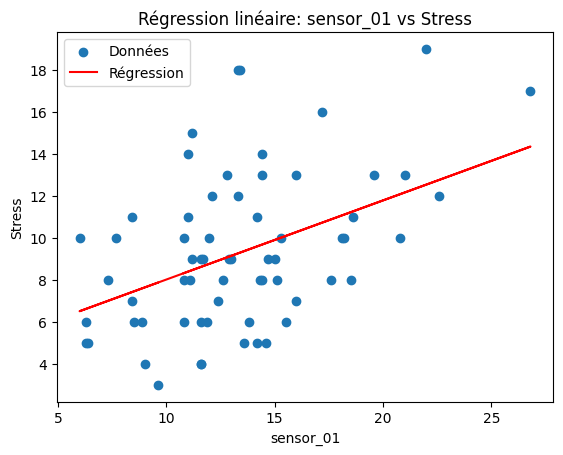

sensor_12: MSE moyen (5-fold CV) = 22.067


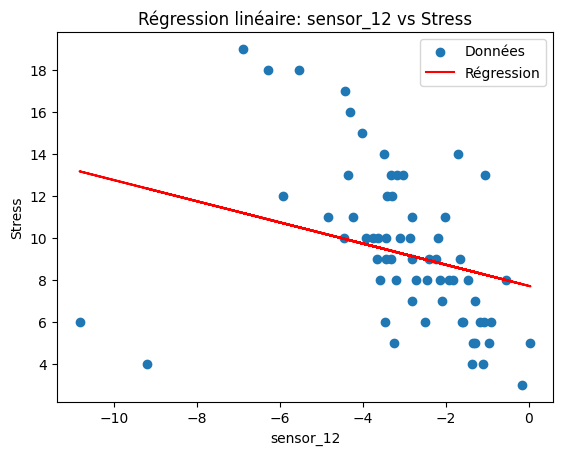

sensor_15: MSE moyen (5-fold CV) = 3.931


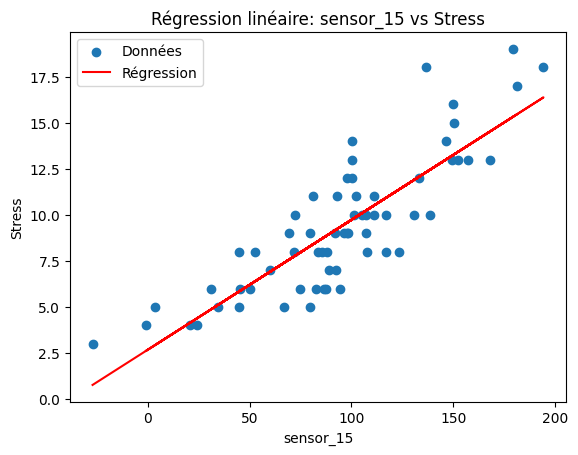

In [8]:
sensors = [0, 11, 14] 
sensor_names = ["sensor_01", "sensor_12", "sensor_15"]

for idx, name in zip(sensors, sensor_names):
    X_sensor = X.iloc[:, idx].values.reshape(-1, 1)
    y = Y.values.ravel()
    lr = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_idx, test_idx in kf.split(X_sensor):
        lr.fit(X_sensor[train_idx], y[train_idx])
        y_pred = lr.predict(X_sensor[test_idx])
        mse_scores.append(mean_squared_error(y[test_idx], y_pred))
    print(f"{name}: MSE moyen (5-fold CV) = {np.mean(mse_scores):.3f}")

    # Affichage du nuage de points et de la droite de régression
    plt.scatter(X_sensor, y, label='Données')
    plt.plot(X_sensor, lr.predict(X_sensor), color='red', label='Régression')
    plt.xlabel(name)
    plt.ylabel('Stress')
    plt.title(f"Régression linéaire: {name} vs Stress")
    plt.legend()
    plt.show()

On a fait une validation croisé à l'aide d'un KFlod de 5 splits.
Le KFold semble être un bon choix de validation croisé car on vérifie que le modèle reste rosbuste même sur un plus petit jeu de données.

In [9]:
from scipy.stats import pearsonr

sensors = [0, 11, 14]
sensor_names = ["sensor_01", "sensor_12", "sensor_15"]

for sensor_id, name in zip(sensors, sensor_names):
    x = X.iloc[:, sensor_id].values
    y = Y.values.ravel()
    corr, pval = pearsonr(x, y)
    print(f"{name}: corrélation = {corr:.3f}, p-value = {pval:.3e}")
    if pval < 0.05:
        print(f"Relation significative entre {name} et le stress (p < 0.05)")
    else:
        print(f"Aucune relation significative entre {name} et le stress (p >= 0.05)")

sensor_01: corrélation = 0.470, p-value = 8.867e-05
Relation significative entre sensor_01 et le stress (p < 0.05)
sensor_12: corrélation = -0.407, p-value = 8.357e-04
Relation significative entre sensor_12 et le stress (p < 0.05)
sensor_15: corrélation = 0.846, p-value = 1.495e-18
Relation significative entre sensor_15 et le stress (p < 0.05)


##### Réponse Question 2.2.2

Pour décider statistiquement si il y a une corrélation entre le niveau de stress et les sensors on décide d'utiliser la p-valeur du coefficient de corrélation de Pearson pour un alpha de 0.05 
# pas sur de celle la


### QUESTION 2.3

On s'intéresse maintenant au lien entre la variable *sensor_12* et le niveau de stress. On peut remarquer qu'il semble exister une relation linéaire entre ces variables, mais que les données contiennent aussi deux valeurs aberrantes.


#### QUESTION 2.3.1

**Stratégie 1** : Quelle stratégie utiliseriez vous pour détecter automatiquement des données aberrantes dans un jeu de données ?

#### QUESTION 2.3.2

**Stratégie 2** : Nous allons ici utiliser toutes les observations pour l'apprentissage du modèle linéaire et sa validation. En supposant que les erreurs de prédiction suivent une loi normale centrée, pourrait-on aussi détecter les outliers à partir d'un test d'hypothèse. Si oui, décrivez la procédure.


In [14]:
lr = LinearRegression()
lr.fit(X.iloc[:,11].values.reshape(-1,1), Y)
y_predict = lr.predict(X.iloc[:,11].values.reshape(-1,1))

errors = (Y-y_predict)**2
print(errors)

        Stress
0     0.315259
1     2.322745
2    90.493391
3    32.020094
4     0.434054
..         ...
59    3.193078
60   13.851731
61    3.456033
62  104.900591
63   17.138189

[64 rows x 1 columns]


##### Réponse Question 2.3.1
Pour detecter automatiquement ders valeurs abérantes on pourrait calculer les residus (y - y_hat)**2. Lorsque les valeurs sont grandes on considèrent alors qu'il s'agit d'une valeur abérante

##### Réponse Question 2.3.2
pizza



### QUESTION 2.4


Nous supprimerons dans cette question les deux observations qui sont aberrantes sur la variable *sensor_12*.

Nous souhaitons maintenant sélectionner automatiquement un nombre réduit, mais supérieur à 1, de capteurs qui nous permettraient de prédire au mieux le niveau de stress. Nous allons pour cela utiliser la régression multiple avec un terme de régularisation.

#### QUESTION 2.4.1

Avant d'effectuer une régression linéaire régularisée, il est vivement conseillé d'effectuer une étape de centrage réduction des données. Pourquoi ?


#### QUESTION 2.4.2

Décrivez votre démarche de sélection de variables et vos résultats. Est-ce que l'utilisation des données capteurs vous semble fiable ? 


#### QUESTION 2.4.3

Quelle démarche auriez-vous pour rendre compte des résultats de cette étude sachant que les données contenaient tout de même deux outliers ?

